## Exploratory Data Analysis - Students Adaptivity in Online Education

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy import stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Reading the Data Set

In [2]:
df = pd.read_csv('SALOE.csv')

In [3]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
Rows, Columns = df.shape[0], df.shape[1]
print(f"Number of rows are : {Rows}\nNumber of columns are : {Columns}")

Number of rows are : 1205
Number of columns are : 14


### Checking the Data Imbalance

In [5]:
df.groupby('Adaptivity Level').size()

Adaptivity Level
High        100
Low         480
Moderate    625
dtype: int64

**Observation for High Level Adaptivity are very less, whereas the other two classes are evenly spread in the data set.**

We have 3 approach to deal with this imbalance
1. Preferred - Oversampling Minotrity class through "imblearn.over_sampling.SMOTE()"
2. Less Preferred - Converting the problem to binary classification by clubbing "High and Moderate"
3. Least preferred - Down Sampling the Majority Class, as number of observations are already very low and doing this can further lead to data loss

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


The Data set consists of 1205 Rows and 14 Columns with all the colums of object data type

### Checking Standard and Non Standard Null Values

In [7]:
df.isnull().sum()
# We can se that there are no Standard Missing values in our data set

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

We cannot see any Standard Missing Values Present in our data set

In [8]:
# Checking for Non Standard Missing values
count = 1
for i in df:
    print(f"{count}. Column Name : {i}\n{df[i].value_counts()} ",end='\n\n\n')
    count+=1

1. Column Name : Gender
Boy     663
Girl    542
Name: Gender, dtype: int64 


2. Column Name : Age
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64 


3. Column Name : Education Level
School        530
University    456
College       219
Name: Education Level, dtype: int64 


4. Column Name : Institution Type
Non Government    823
Government        382
Name: Institution Type, dtype: int64 


5. Column Name : IT Student
No     901
Yes    304
Name: IT Student, dtype: int64 


6. Column Name : Location
Yes    935
No     270
Name: Location, dtype: int64 


7. Column Name : Load-shedding
Low     1004
High     201
Name: Load-shedding, dtype: int64 


8. Column Name : Financial Condition
Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64 


9. Column Name : Internet Type
Mobile Data    695
Wifi           510
Name: Internet Type, dtype: int64 


10. Column Name : Network Type
4G    775
3G    411
2G     19
Name: Netwo

After checking all the unique values, we can say that there are no Non Standard Missing Value in the data set either.

Checking for Duplicates in the Data Set

In [9]:
dr = df.copy()

In [10]:
dr.duplicated().sum()

949

In [11]:
dr.drop_duplicates(inplace = True)

In [12]:
dr.duplicated().sum()

0

In [13]:
df.duplicated().sum()

949

1. New Copy was made to compare model performance for models with and without Duplicate values. 
2. Duplicates were removed from the **dr** data set.

Duplicates removed from the **dr** and **df** has been left with duplicates

In [14]:
dr

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,Boy,21-25,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,Low
1132,Boy,16-20,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1149,Girl,16-20,College,Non Government,No,No,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,Low
1160,Boy,21-25,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,Moderate


#### The index should be reset as removal of the duplicates had left the index disoriented

In [15]:
dr.reset_index(inplace = True)

In [16]:
dr.drop('index', axis = 1, inplace=True)
# dr.drop(['index', 'b'], axis = 1, inplace=True)
# Dropping multiple Index instances.

In [17]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               256 non-null    object
 1   Age                  256 non-null    object
 2   Education Level      256 non-null    object
 3   Institution Type     256 non-null    object
 4   IT Student           256 non-null    object
 5   Location             256 non-null    object
 6   Load-shedding        256 non-null    object
 7   Financial Condition  256 non-null    object
 8   Internet Type        256 non-null    object
 9   Network Type         256 non-null    object
 10  Class Duration       256 non-null    object
 11  Self Lms             256 non-null    object
 12  Device               256 non-null    object
 13  Adaptivity Level     256 non-null    object
dtypes: object(14)
memory usage: 28.1+ KB


In [18]:
dr.describe()
# Summary for both numerical as well as object class

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,256,256,256,256,256,256,256,256,256,256,256,256,256,256
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,148,101,121,152,178,182,202,183,138,161,163,198,207,118


Inferences:
    
1. Duplicate Entries: Total Observations Left after removing duplicates are just 256 against the initial observations count of 1205.
2. Gender: The data set has more number of observation for Boys: 148 against the Girls: 108.
3. Age: Most of the observation revolve around adults with age between 21 and 25.
4. Education Level: Most students are currently in University and there age may me attributed to be close to modal class of Age columns.
5. Institution Type: Most of the students are studying in Non Government Institution.
6. Location: Very Large percentage of students live in the same location as their institution.
7. Load Shedding: Load shedding is very common in our data set with around 80% students experiencing it.
8. Financial Condition: Financial condition for most of the students are Mid, where the other categories are High and Low.
9. Internet Type: Most of the student work on Mobile Data.
10. Network Type: 4G is the most prevalent Network type as seen in the data.
11. Class Duration: Most of the classes have time dureation in range of 1 to 3 hours.
12. Self LMS: Most of the students dont do self LMS.
13. The most common device used in taking the classes are mobile phones.
14. Adaptivity Level: This is our target variable with Mostly students being moderately adaptive.

### Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

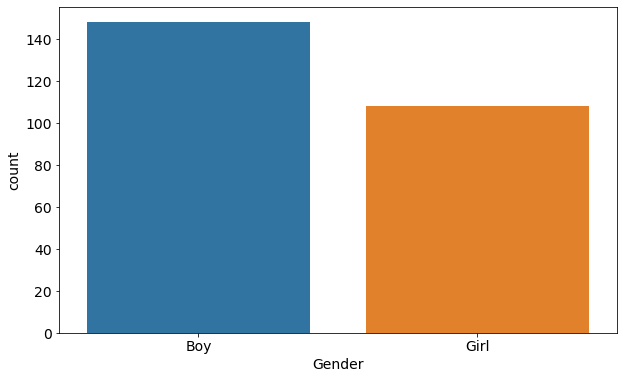

In [19]:
# Gender
sns.countplot(x = dr['Gender'])

The observations contain a little more number of boys than girls. This may indicate the below points:-
    
1. Imbalance among the Gender of Students in the school or college.
2. Biased Sampling.

<AxesSubplot:xlabel='Age', ylabel='count'>

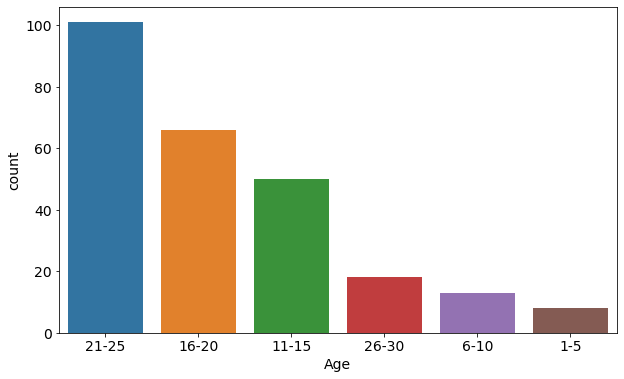

In [20]:
# Age
sns.countplot(x = dr.Age)

1. Most of the students are of the age group "11-25".
2. There are very less observation for the age group '1-10' and '26-20'

<AxesSubplot:xlabel='Education Level', ylabel='count'>

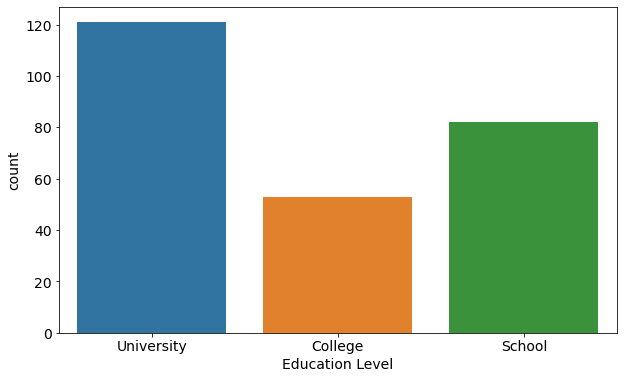

In [21]:
sns.countplot(x ='Education Level', data = dr)

1. The maximum observation has the student stuying in University followed by school with college having the minimum number of of observation

<AxesSubplot:xlabel='Institution Type', ylabel='count'>

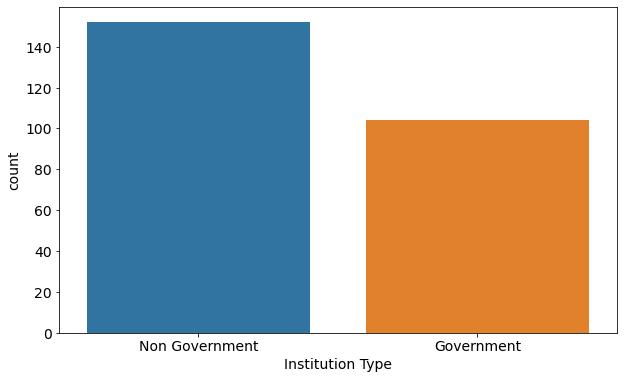

In [22]:
sns.countplot(x ='Institution Type', data = dr)

1. Non Government Educational Institue have more student as compared to government institutions

<AxesSubplot:xlabel='IT Student', ylabel='count'>

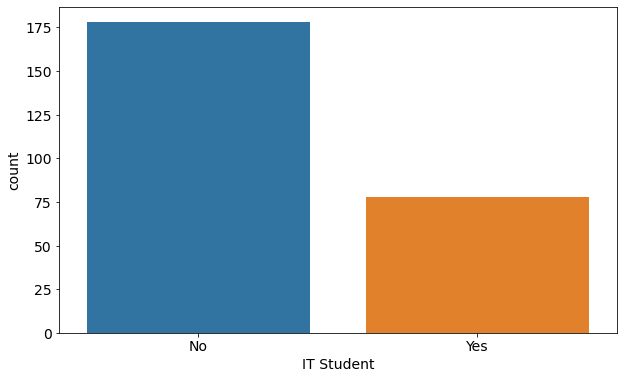

In [23]:
sns.countplot(x ='IT Student', data = dr)

1.  Major portion of the Observation has students with non IT Background

<AxesSubplot:xlabel='Location', ylabel='count'>

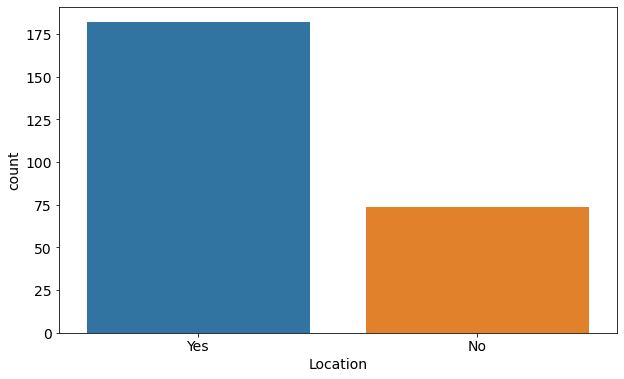

In [24]:
sns.countplot(x ='Location', data = dr)

1. ~65% of the Students are living at the same location as of the Educational Institute

<AxesSubplot:xlabel='Load-shedding', ylabel='count'>

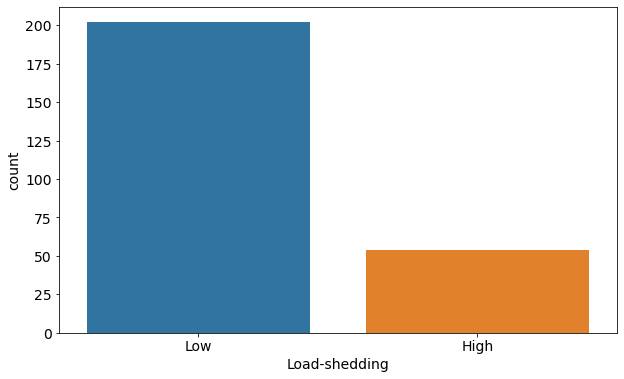

In [25]:
sns.countplot(x ='Load-shedding', data = dr)

1. Max Students only experience low electricity outage due to load shedding
2. Around 25% of the Students experience high load shedding electricity outage

<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

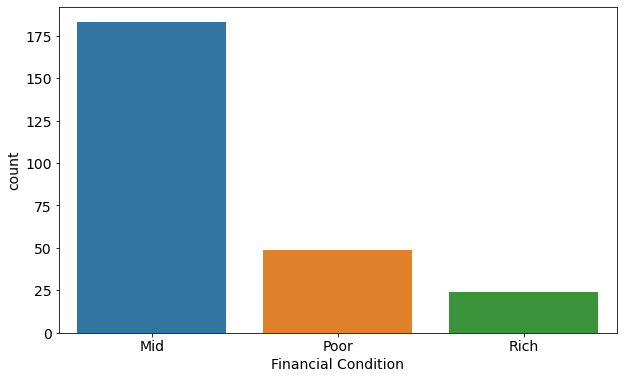

In [26]:
sns.countplot(x ='Financial Condition', data = dr)

1. Most of the students belong to families with Mid Level Financial Condition. 
2. There are very less number of students from poor or rich Family


** Note : Do a Bivariate analysis on 'Financial Condition' and 'Education Level' **

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

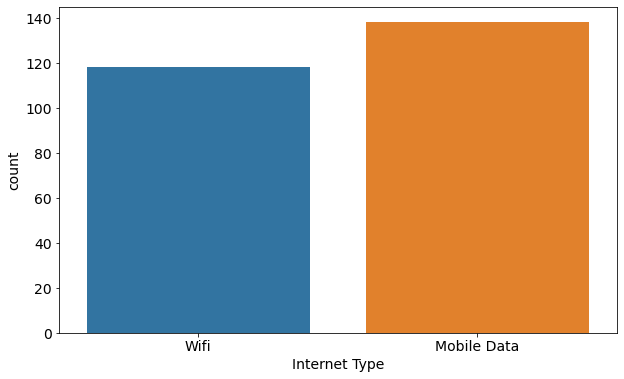

In [27]:
sns.countplot(x ='Internet Type', data = dr)

Both Mobile and Wifi are evenly used by the students for internet connection

<AxesSubplot:xlabel='Network Type', ylabel='count'>

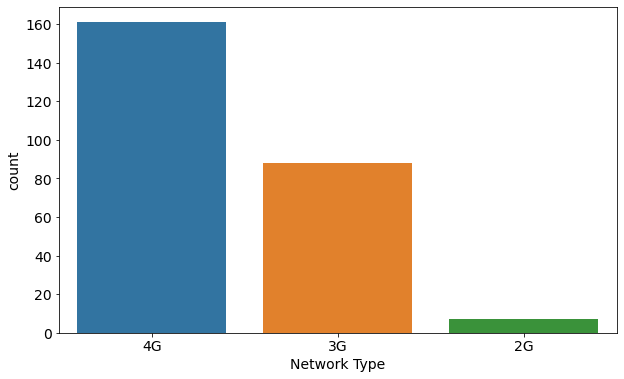

In [28]:
sns.countplot(x ='Network Type', data = dr)

1. Most of the students are well equipped with latest Network type where as 1/3rd of the students are using 3G network Type too.
2. There are very less number of students who are still using 2G network type

<AxesSubplot:xlabel='Class Duration', ylabel='count'>

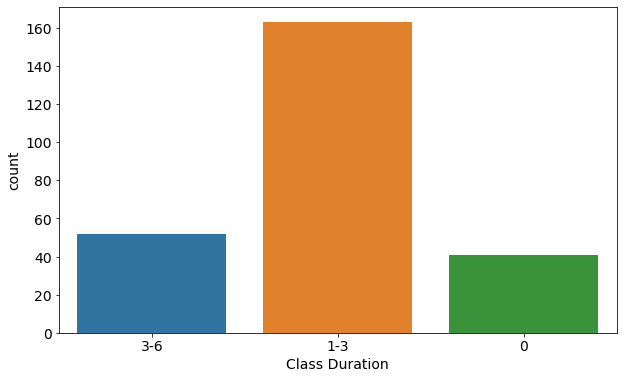

In [29]:
sns.countplot(x ='Class Duration', data = dr)

1. Most of the classes are of the duration of 1-3 hours 
2. Some observation have 0 as the class duration, this might indicate observations where the class may have been cancled or not attended 
3. Some classes are of extended duration, where the duration ranges from 3-6

<AxesSubplot:xlabel='Self Lms', ylabel='count'>

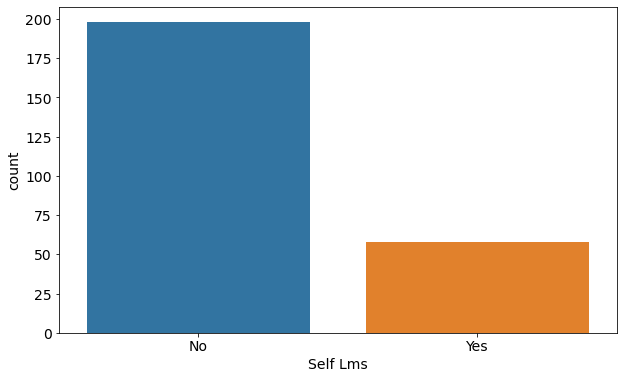

In [30]:
sns.countplot(x ='Self Lms', data = dr)

1. ~ 1/4th of the students are doing self LMS.

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

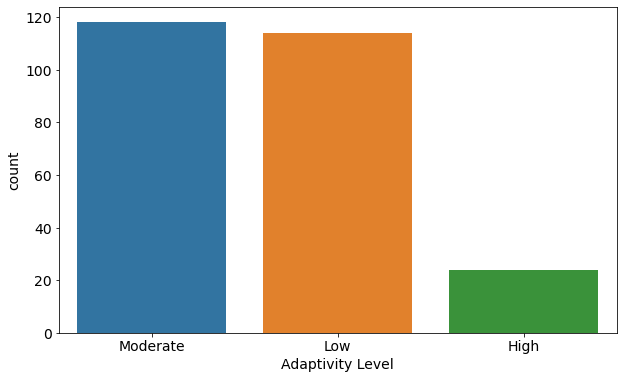

In [31]:
sns.countplot(x ='Adaptivity Level', data = dr)

1. Moderate and Low Adaptivity level are spread evenly among the students in observation, where as there are very less number students with high adaptibility.

<AxesSubplot:xlabel='Device', ylabel='count'>

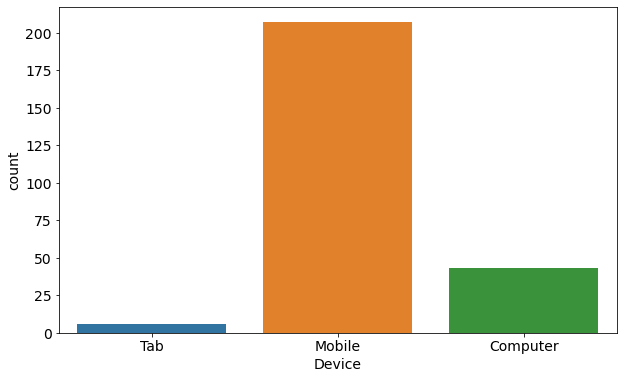

In [32]:
sns.countplot(x ='Device', data = dr)

1. Most of the Students are using Mobile Device for taking the online classes.
2. Computer and tab are used by very less number of Students.

## Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

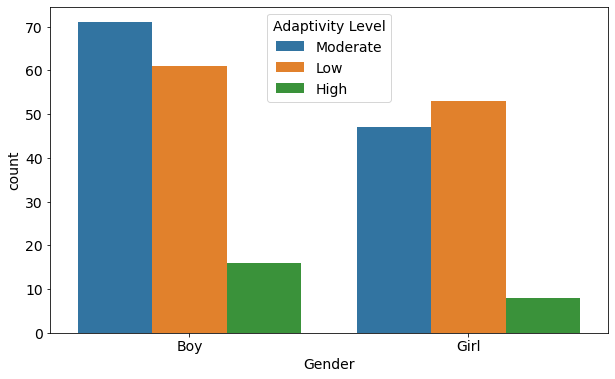

In [33]:
# Gender vs Adaptibility
sns.countplot(data = dr, x = 'Gender', hue='Adaptivity Level')

A. Boys: Maximum number of boys have Moderate Adaptivity Level followed by Low Adaptivity Level

B. Girls: Maximum number of Girls have Low Adaptivity Level followed by Moderate Adaptivity Level


1. The Average Adaptivity Level for girls are lower than that of boys
2. Very less number of Students are having High Adaptivity level

<AxesSubplot:xlabel='Age', ylabel='count'>

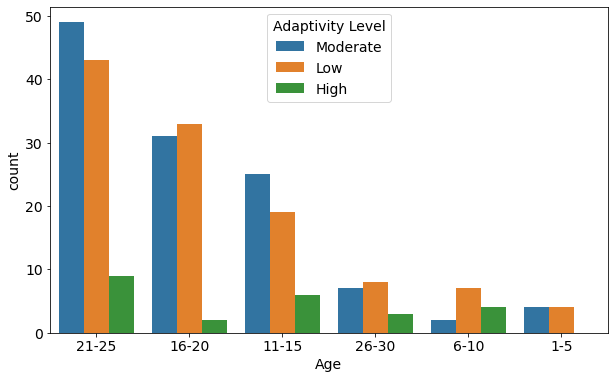

In [34]:
# Age
sns.countplot(x = 'Age', data = dr, hue= 'Adaptivity Level')

1. The Average Adaptivity level is seen to be decreasing with the decrease in age for students with age rane of 11 - 25
2. The Adaptivity Level for the age grop 1 to 10 and 26-30 are very low and almost same for when compared. 

**Note: We can consider clubbing the three categories with the least Adaptibility level.**

<AxesSubplot:xlabel='Education Level', ylabel='count'>

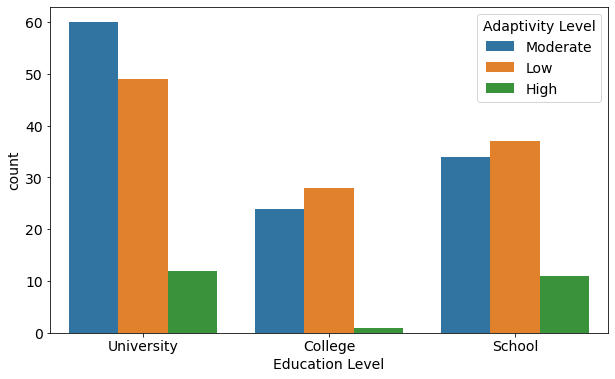

In [35]:
sns.countplot(x ='Education Level', data = dr, hue= 'Adaptivity Level')


1. Average Adaptivity Level for the students in university is the highest
2. The Adaptibility level for College and School are very close to each other and both are lower than University Students' Adativity Level.
3. The Number of students with high adaptivty are lowest in case of College level education, whereas highest in University students.
4. High Adaptivity level is highest in schools when compared with other classes as a percentage

<AxesSubplot:xlabel='Institution Type', ylabel='count'>

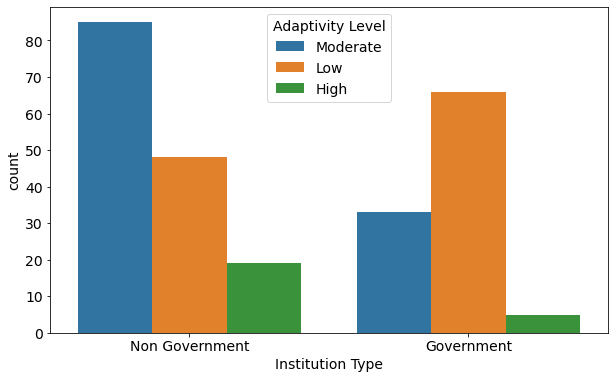

In [36]:
sns.countplot(x ='Institution Type', data = dr , hue = 'Adaptivity Level')

1. Students in Government Intitution are more prone to low Adaptibility level whereas the most prevalent Adaptibility level for Non Government Institutions are Moderate.

2. There is high disparity seen in High Adaptitvity Level among students in Governement and Non Government Education Institution  
This trend indicated either lack of Facilities for online education in Government Institution or Poor Financial Situation of the students studying there.

**Note: Relationship between Institution type and Financial condition to be checked in Bivariate analysis** 

<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

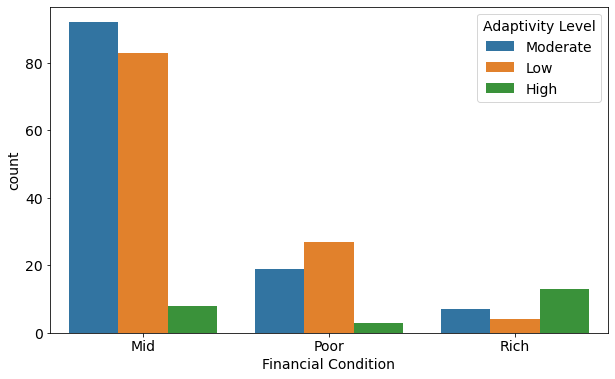

In [37]:
sns.countplot(x ='Financial Condition', data = dr , hue = 'Adaptivity Level')

1. Rich Students are having better Adaptibility
2. Poor Students are having the least Average Adaptivity
3. Mid Students are having Most instances of moderate Adaptibility with Low Adaptibility following.

<AxesSubplot:xlabel='IT Student', ylabel='count'>

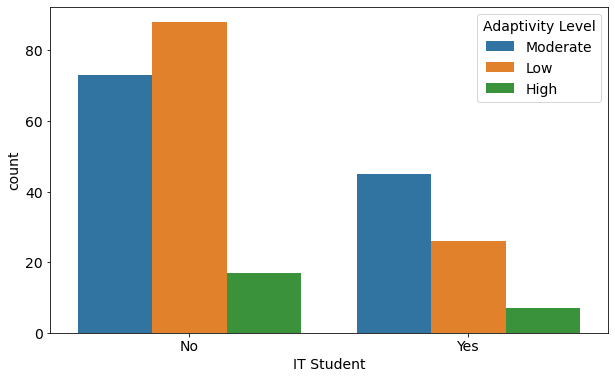

In [38]:
sns.countplot(x ='IT Student', data = dr , hue = 'Adaptivity Level')

1. The Data Set has more observation for Non IT Students in compared to IT Students
2. IT Students have more students having moderate Adaptivity Level, where as more Non IT Students are seen to be having Low Adaptivity. 

<AxesSubplot:xlabel='Location', ylabel='count'>

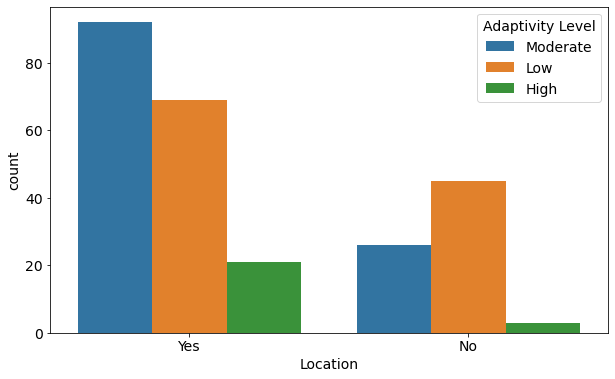

In [39]:
sns.countplot(x ='Location', data = dr , hue = 'Adaptivity Level')

1. The Data Set has more observation of Students at the same location as that of Educational Institute.
2. Students at the same location are more adaptive than students who are not at the same location as of Institution. This trend could be due to the fact that there are some in person support required by the students in mean of counciling, motivation and etc. 

<AxesSubplot:xlabel='Load-shedding', ylabel='count'>

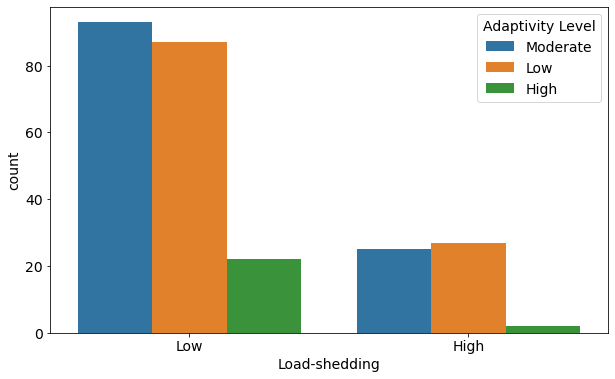

In [40]:
sns.countplot(x ='Load-shedding', data = dr , hue = 'Adaptivity Level')

High and Moderate productivity are little biased towards the students who witness less load shedding

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

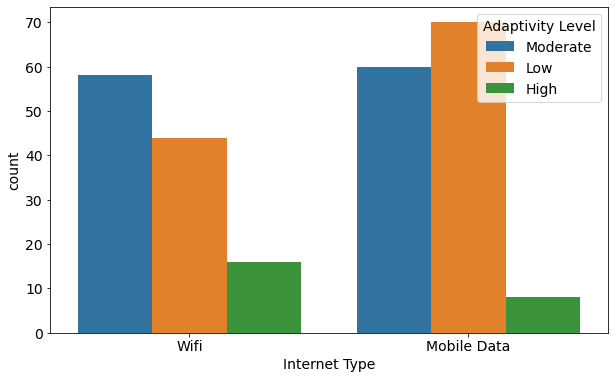

In [41]:
sns.countplot(x ='Internet Type', data = dr , hue = 'Adaptivity Level')

1. Higher Adaptivity corresponds to the students having wifi connection, whereas lesser students with mobile data are seen to have high productivity.
2. Number of students with Low productivity are reduced when the internet type is wifi and vice versa is true for students with mobile data. 

<AxesSubplot:xlabel='Network Type', ylabel='count'>

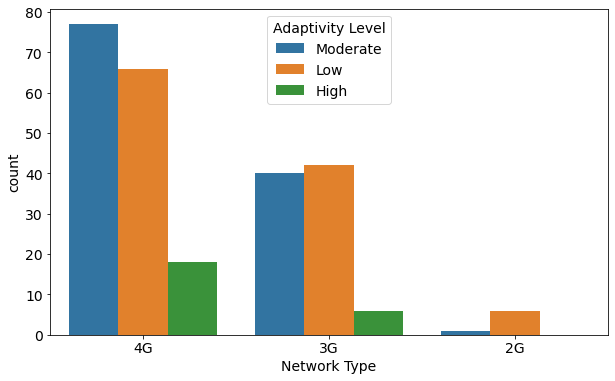

In [42]:
sns.countplot(x ='Network Type', data = dr , hue = 'Adaptivity Level')

1. Number of students with high Adaptibility decrease along with decrease in Network technology.
2. Average Adaptibility is highest in case of 4G network type followed by 3G then 2G.

<AxesSubplot:xlabel='Class Duration', ylabel='count'>

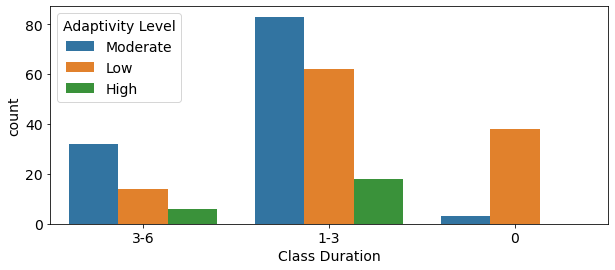

In [43]:
plt.figure(figsize = [10,4])
sns.countplot(x ='Class Duration', data = dr, hue = 'Adaptivity Level')

1. Maximum percentage of Students having class duration 3-6 hours are having moderate adapticvity.
2. Students have low Adaptibility in case of Missed or canceled class (duration = 0)

<AxesSubplot:xlabel='Self Lms', ylabel='count'>

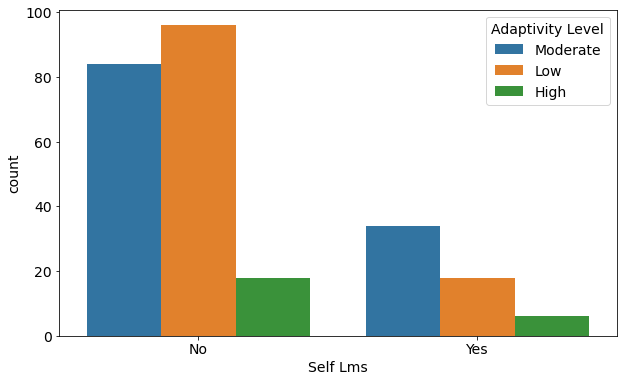

In [44]:
sns.countplot(x ='Self Lms', data = dr , hue = 'Adaptivity Level')

Self LMS is resulting into increased productivity

<AxesSubplot:xlabel='Device', ylabel='count'>

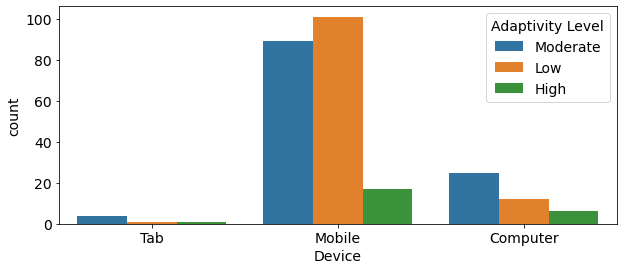

In [45]:
plt.figure(figsize=[10,4])
sns.countplot(x ='Device', data = dr , hue = 'Adaptivity Level')

1. Students using Mobile are found to have lower adativity whereas the Adaptibility seems to be better in case of Tab and computer
2. Most of the students are using Mobile devices, which might indicate non availability of Computers and tab or lack of interest

## Feature Engineering

In [46]:
dr_temp = dr.copy()


#### Converting 'Age' to 'Mean_Age'

In [47]:
dr['Age'].replace({'21-25' : 23, '16-20' : 18, '1-5' : 3, '6-10' : 8, '26-30' : 28, '11-15' : 13}, inplace = True)
dr

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,23,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,23,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,18,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,18,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,Low
252,Boy,18,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
253,Girl,18,College,Non Government,No,No,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,Low
254,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,Moderate


In [48]:
dr.rename(columns = {'Age': 'Median_age'}, inplace = True)
dr

,Gender,Median_age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,23,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,23,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,18,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,18,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,Low
252,Boy,18,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
253,Girl,18,College,Non Government,No,No,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,Low
254,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,Moderate


#### Changing values in Class Duration and renaming the column to maximum duration

In [49]:
for i in dr['Class Duration']:
    dr['Class Duration'].replace(i,i[-1], inplace = True)
dr.rename(columns = {'Class Duration': 'Max_duration'}, inplace = True)

In [50]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               256 non-null    object
 1   Median_age           256 non-null    int64 
 2   Education Level      256 non-null    object
 3   Institution Type     256 non-null    object
 4   IT Student           256 non-null    object
 5   Location             256 non-null    object
 6   Load-shedding        256 non-null    object
 7   Financial Condition  256 non-null    object
 8   Internet Type        256 non-null    object
 9   Network Type         256 non-null    object
 10  Max_duration         256 non-null    object
 11  Self Lms             256 non-null    object
 12  Device               256 non-null    object
 13  Adaptivity Level     256 non-null    object
dtypes: int64(1), object(13)
memory usage: 28.1+ KB


#### Converting Data type of Age from 'int' to 'object'

In [51]:
dr['Median_age'] = dr['Median_age'].astype(object) 

In [52]:
dr.info()
# The data Type has been successfully changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               256 non-null    object
 1   Median_age           256 non-null    object
 2   Education Level      256 non-null    object
 3   Institution Type     256 non-null    object
 4   IT Student           256 non-null    object
 5   Location             256 non-null    object
 6   Load-shedding        256 non-null    object
 7   Financial Condition  256 non-null    object
 8   Internet Type        256 non-null    object
 9   Network Type         256 non-null    object
 10  Max_duration         256 non-null    object
 11  Self Lms             256 non-null    object
 12  Device               256 non-null    object
 13  Adaptivity Level     256 non-null    object
dtypes: object(14)
memory usage: 28.1+ KB


## Separating the dependent and the independent variables

In [53]:
cativs = dr.drop('Adaptivity Level', axis = 1)
cativs

,Gender,Median_age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Max_duration,Self Lms,Device
0,Boy,23,University,Non Government,No,Yes,Low,Mid,Wifi,4G,6,No,Tab
1,Girl,23,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,3,Yes,Mobile
2,Girl,18,College,Government,No,Yes,Low,Mid,Wifi,4G,3,No,Mobile
3,Girl,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3,No,Mobile
4,Girl,18,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,6,No,Computer
252,Boy,18,College,Government,No,Yes,Low,Mid,Mobile Data,3G,3,No,Mobile
253,Girl,18,College,Non Government,No,No,Low,Mid,Mobile Data,3G,3,Yes,Mobile
254,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3,Yes,Mobile


In [54]:
y = dr['Adaptivity Level']
y

0      Moderate
1      Moderate
2      Moderate
3      Moderate
4           Low
         ...   
251         Low
252    Moderate
253         Low
254    Moderate
255    Moderate
Name: Adaptivity Level, Length: 256, dtype: object

In [55]:
y

0      Moderate
1      Moderate
2      Moderate
3      Moderate
4           Low
         ...   
251         Low
252    Moderate
253         Low
254    Moderate
255    Moderate
Name: Adaptivity Level, Length: 256, dtype: object

### Feature significance
Checking Feature Importance through Chi- Square test

In [56]:
# cativs.drop('index', axis = 1,inplace=True)
cativs

,Gender,Median_age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Max_duration,Self Lms,Device
0,Boy,23,University,Non Government,No,Yes,Low,Mid,Wifi,4G,6,No,Tab
1,Girl,23,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,3,Yes,Mobile
2,Girl,18,College,Government,No,Yes,Low,Mid,Wifi,4G,3,No,Mobile
3,Girl,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3,No,Mobile
4,Girl,18,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,6,No,Computer
252,Boy,18,College,Government,No,Yes,Low,Mid,Mobile Data,3G,3,No,Mobile
253,Girl,18,College,Non Government,No,No,Low,Mid,Mobile Data,3G,3,Yes,Mobile
254,Boy,23,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3,Yes,Mobile


In [57]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
sig_cativs = []
insig_cativs = []

for i in cativs:
    print(f"H0 : {i} and Is_canceled are independent \nH1 : {i} and Is_canceled are dependent\n")
    ct = pd.crosstab(y, cativs[i], margins = True)
    print(ct, end='\n\n')
    obs = np.array([ct.iloc[0][0:5].values, ct.iloc[1][0:5].values])
    print(stats.chi2_contingency(obs)[0:3])
    sig = 0.05
    if sig>stats.chi2_contingency(obs)[0:3][1]:
        print(f'As the P Value : {stats.chi2_contingency(obs)[0:3][1]} < Significance Level : {sig}, we reject the null hypothesis ')
        print(f'{i} is Significant', end='\n\n\n\n')
        sig_cativs.append(i)
    else:
        print(f'As the P Value : {stats.chi2_contingency(obs)[0:3][1]} >= Significance Level {sig}, we are unable to reject the null hypothesis ')
        print(f'{i} is Insignificant', end='\n\n\n\n')
        insig_cativs.append(i)

H0 : Gender and Is_canceled are independent 
H1 : Gender and Is_canceled are dependent

Gender            Boy  Girl  All
Adaptivity Level                
High               16     8   24
Low                61    53  114
Moderate           71    47  118
All               148   108  256

(1.3917057920509166, 0.4986489708417161, 2)
As the P Value : 0.4986489708417161 >= Significance Level 0.05, we are unable to reject the null hypothesis 
Gender is Insignificant



H0 : Median_age and Is_canceled are independent 
H1 : Median_age and Is_canceled are dependent

Median_age        3   8  13  18   23  28  All
Adaptivity Level                             
High              0   4   6   2    9   3   24
Low               4   7  19  33   43   8  114
Moderate          4   2  25  31   49   7  118
All               8  13  50  66  101  18  256

(7.927429089329359, 0.09427302512518038, 4)
As the P Value : 0.09427302512518038 >= Significance Level 0.05, we are unable to reject the null hypothesis 
Median

In [58]:
print(insig_cativs)


['Gender', 'Median_age', 'Education Level', 'IT Student', 'Load-shedding', 'Network Type', 'Self Lms', 'Device']


In [59]:
print(sig_cativs)

['Institution Type', 'Location', 'Financial Condition', 'Internet Type', 'Max_duration']


In [60]:
cativs.drop(insig_cativs, axis = 1, inplace = True)

In [61]:
cativs

,Institution Type,Location,Financial Condition,Internet Type,Max_duration
0,Non Government,Yes,Mid,Wifi,6
1,Non Government,Yes,Mid,Mobile Data,3
2,Government,Yes,Mid,Wifi,3
3,Non Government,Yes,Mid,Mobile Data,3
4,Non Government,Yes,Poor,Mobile Data,0
...,...,...,...,...,...
251,Non Government,No,Mid,Mobile Data,6
252,Government,Yes,Mid,Mobile Data,3
253,Non Government,No,Mid,Mobile Data,3
254,Non Government,No,Mid,Mobile Data,3


## Dummy Encoding
Dummy encoding the significant variables observed after Hypothesis testing with the help of Chi Square test of Independence

In [62]:
X = pd.get_dummies(cativs, drop_first = True)
X

,Institution Type_Non Government,Location_Yes,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Wifi,Max_duration_3,Max_duration_6
0,1,1,0,0,1,0,1
1,1,1,0,0,0,1,0
2,0,1,0,0,1,1,0
3,1,1,0,0,0,1,0
4,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
251,1,0,0,0,0,0,1
252,0,1,0,0,0,1,0
253,1,0,0,0,0,1,0
254,1,0,0,0,0,1,0


## Splitting the Data into Training and Testing

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
# This order must be preserved while doing Train Test Split

# Model Building 
## Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [66]:
dtc = DecisionTreeClassifier()

In [67]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred = dtc.predict(x_test)
y_pred

array(['Low', 'Low', 'Low', 'Moderate', 'Moderate', 'Moderate', 'Low',
       'Low', 'Moderate', 'Moderate', 'Moderate', 'Low', 'High', 'Low',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Low', 'Moderate', 'Low', 'Moderate', 'Low',
       'Moderate', 'Low', 'Low', 'Moderate', 'Moderate', 'Low', 'Low',
       'Low', 'Moderate', 'Moderate', 'High', 'Moderate', 'Low', 'Low',
       'Moderate', 'Low', 'Low', 'Low', 'Low', 'Moderate', 'Moderate',
       'Moderate', 'Low', 'Moderate', 'Moderate', 'Moderate', 'Low'],
      dtype=object)

In [69]:
dtc.predict_proba(x_test)

array([[0.        , 0.63636364, 0.36363636],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.57142857, 0.42857143],
       [0.        , 0.45454545, 0.54545455],
       [0.        , 0.45454545, 0.54545455],
       [0.05882353, 0.35294118, 0.58823529],
       [0.18181818, 0.45454545, 0.36363636],
       [0.        , 1.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [0.        , 0.        , 1.        ],
       [0.05882353, 0.35294118, 0.58823529],
       [0.        , 1.        , 0.        ],
       [0.57142857, 0.        , 0.42857143],
       [0.18181818, 0.45454545, 0.36363636],
       [0.07692308, 0.34615385, 0.57692308],
       [0.05      , 0.25      , 0.7       ],
       [0.        , 0.14285714, 0.85714286],
       [0.        , 0.        , 1.        ],
       [0.07692308, 0.34615385, 0.57692308],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.05882353, 0.35294118, 0.58823529],
       [0.

In [70]:
print(f"Accurancy of the model is : {accuracy_score(y_pred,y_test)*100}")

Accurancy of the model is : 61.53846153846154


In [71]:
confusion_matrix(y_pred, y_test)

array([[ 1,  1,  0],
       [ 2, 14,  7],
       [ 2,  8, 17]], dtype=int64)

In [72]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        High       0.20      0.50      0.29         2
         Low       0.61      0.61      0.61        23
    Moderate       0.71      0.63      0.67        27

    accuracy                           0.62        52
   macro avg       0.51      0.58      0.52        52
weighted avg       0.64      0.62      0.63        52



# Making Model with :-
## Duplicate Values + Insignificant Columns

In [73]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [74]:
xdf = pd.get_dummies(df.drop('Adaptivity Level', axis = 1), drop_first = True)
xdf

,Gender_Girl,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_School,Education Level_University,Institution Type_Non Government,IT Student_Yes,Location_Yes,Load-shedding_Low,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Wifi,Network Type_3G,Network Type_4G,Class Duration_1-3,Class Duration_3-6,Self Lms_Yes,Device_Mobile,Device_Tab
0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0
2,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0
4,1,0,1,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0
1201,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
1202,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
1203,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0


In [75]:
ydf = df['Adaptivity Level']
ydf

0       Moderate
1       Moderate
2       Moderate
3       Moderate
4            Low
          ...   
1200         Low
1201    Moderate
1202    Moderate
1203         Low
1204    Moderate
Name: Adaptivity Level, Length: 1205, dtype: object

In [76]:
x_train, x_test, y_train, y_test = train_test_split(xdf,ydf,test_size = 0.2, random_state = 2)

In [77]:
dtc2 = DecisionTreeClassifier()

In [78]:
dtc2.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
dtc2.predict_proba(x_test)

array([[0.        , 1.        , 0.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.2173913 , 0.7826087 ],
       [0.        , 0.72727273, 0.27272727],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.2173913 , 0.7826087 ],
       [0.        , 1.        , 0.        ],
       [0.

In [80]:
ydf_pred = dtc2.predict(x_test)

In [81]:
print(classification_report(ydf_pred,y_test))

              precision    recall  f1-score   support

        High       0.67      0.86      0.75        21
         Low       0.90      0.84      0.87        85
    Moderate       0.90      0.90      0.90       135

    accuracy                           0.88       241
   macro avg       0.82      0.87      0.84       241
weighted avg       0.88      0.88      0.88       241



In [82]:
print(f"The model accuracy came out to be : {accuracy_score(ydf_pred,y_test)*100}")

The model accuracy came out to be : 87.55186721991701


### As we can see that there is improved accuracy, recall, precission and F1 score in the model with duplicates, we can infer presence of data leakage and this could result into overfitting.

# Making Model without duplicates but all the features

In [83]:
x_all = pd.get_dummies(dr.drop('Adaptivity Level',axis = 1))

In [84]:
y_all = dr['Adaptivity Level']

### Train Test Split

In [85]:
xall_train, xall_test, yall_train, yall_test = train_test_split(x_all, y_all, test_size = 0.25, random_state = 2)

In [86]:
dtc3 = DecisionTreeClassifier(criterion = 'entropy')

In [87]:
dtc3.fit(xall_train, yall_train)

DecisionTreeClassifier(criterion='entropy')

In [88]:
yall_pred = dtc3.predict(xall_test)
yall_pred

array(['Moderate', 'Moderate', 'Low', 'Low', 'Moderate', 'Low', 'Low',
       'High', 'Low', 'Low', 'Moderate', 'Low', 'High', 'Moderate', 'Low',
       'Moderate', 'Low', 'Moderate', 'Low', 'Moderate', 'Low', 'Low',
       'Low', 'Moderate', 'Low', 'Moderate', 'Low', 'Low', 'Moderate',
       'Low', 'Low', 'Moderate', 'Low', 'Moderate', 'Moderate', 'High',
       'Low', 'Low', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Low',
       'Low', 'Low', 'Moderate', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Moderate', 'Moderate', 'High', 'Moderate', 'Low', 'Moderate',
       'High', 'Low', 'Low', 'Low', 'Moderate', 'Low'], dtype=object)

In [89]:
dtc3.predict_proba(xall_test)

array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. 

In [90]:
print(classification_report(yall_pred, yall_test))

              precision    recall  f1-score   support

        High       0.17      0.20      0.18         5
         Low       0.76      0.61      0.68        36
    Moderate       0.48      0.61      0.54        23

    accuracy                           0.58        64
   macro avg       0.47      0.47      0.47        64
weighted avg       0.61      0.58      0.59        64



In [91]:
print('Accuracy    : ',accuracy_score(yall_pred,yall_test)*100,'%')

Accuracy    :  57.8125 %


As we can see that using all the feature (Significant + Insignificant) is making our model perform worse

## Random Forest Model

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 2)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, stratify = y)

In [95]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

In [96]:
y_pred = rfc.predict(x_test)
y_pred

array(['Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Low', 'Low', 'Moderate', 'Moderate',
       'Low', 'Moderate', 'Moderate', 'Low', 'Moderate', 'Low',
       'Moderate', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Low', 'Moderate', 'Moderate', 'Low', 'Moderate',
       'Moderate', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Low',
       'Moderate', 'Moderate', 'Moderate', 'Low', 'Moderate', 'Moderate',
       'Low', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Low', 'Low', 'Moderate', 'Low', 'Low', 'Low'], dtype=object)

In [97]:
ypred_prob = rfc.predict_proba(x_test)
ypred_prob

array([[0.34143984, 0.13631616, 0.522244  ],
       [0.02256061, 0.48392045, 0.49351894],
       [0.32056004, 0.0063305 , 0.67310946],
       [0.32056004, 0.0063305 , 0.67310946],
       [0.        , 0.46519063, 0.53480937],
       [0.12079423, 0.25877292, 0.62043284],
       [0.12079423, 0.25877292, 0.62043284],
       [0.00166667, 0.21075   , 0.78758333],
       [0.34143984, 0.13631616, 0.522244  ],
       [0.32056004, 0.0063305 , 0.67310946],
       [0.        , 0.46519063, 0.53480937],
       [0.        , 0.46519063, 0.53480937],
       [0.09085759, 0.642953  , 0.26618941],
       [0.        , 0.6745    , 0.3255    ],
       [0.23769336, 0.38090332, 0.38140332],
       [0.        , 0.46519063, 0.53480937],
       [0.        , 0.65922367, 0.34077633],
       [0.04549571, 0.24555504, 0.70894925],
       [0.12079423, 0.25877292, 0.62043284],
       [0.        , 0.6745    , 0.3255    ],
       [0.23769336, 0.38090332, 0.38140332],
       [0.09085759, 0.642953  , 0.26618941],
       [0.

In [98]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.34      0.56      0.43        18
    Moderate       0.76      0.48      0.59        46

    accuracy                           0.50        64
   macro avg       0.37      0.34      0.34        64
weighted avg       0.64      0.50      0.54        64



In [99]:
from pprint import pprint
pprint(rfc.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}


### Hyperparameter Tuning with Random Forest Classifier 

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
# Number of trees in random forest, So that the number of trees for the best result can be identified
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]


# Number of features to consider at every split
max_features = ['auto', 'sqrt']



# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 11)]
max_depth.append(None)
# [5, 9, 14, 18, 23, 27, 32, 36, 41, 45, 50, None]



# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10]


# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]


# Method of selecting samples for training each tree
bootstrap = [True, False]

In [102]:
# Create the random grid
random_grid = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
                }

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 9, 14, 18, 23, 27, 32, 36, 41, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 8, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [103]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rfc_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 9, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [104]:
y_pred = rfc_random.predict(x_test)

In [105]:
y_pred_proba = rfc_random.predict_proba(x_test)

In [106]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.41      0.50      0.45        24
    Moderate       0.62      0.45      0.52        40

    accuracy                           0.47        64
   macro avg       0.34      0.32      0.32        64
weighted avg       0.54      0.47      0.50        64



In [112]:
print(f"Accuracy Score : {accuracy_score(y_pred, y_test)*100}")

Accuracy Score : 46.875
